In [1]:
# processing
from scipy.special import comb, binom
import numpy as np

# visualization
import matplotlib.pyplot as plt

In [2]:
def Pr_m_geq_k(k, l, theta):
    """
    Calculate the probability of having k or more mutations in a sequence of length l
    with mutation probability theta.
    """
    return sum(comb(l, x) * (theta ** x) * ((1 - theta) ** (l - x)) for x in range(k, l+1))

def calculate_expression_probabilities(l, theta, m_star):
    """
    Calculate the probabilities of high and low expression levels based on the number
    of mutations and a threshold m_star.
    """
    Pr_mu_high = 1 - Pr_m_geq_k(m_star, l, theta)  # Pr(m < m*; l, theta)
    Pr_mu_low = Pr_m_geq_k(m_star, l, theta)  # Pr(m >= m*; l, theta)
    return Pr_mu_high, Pr_mu_low

def calculate_joint_probabilities(l, theta, m_star, position_in_binding_site):
    """
    Calculate the joint probabilities of base identity and expression levels for positions
    within the RNAP binding site.
    """
    Pr_mu_high, Pr_mu_low = calculate_expression_probabilities(l, theta, m_star)
    
    if position_in_binding_site:
        Pr_mu_high_given_b0, Pr_mu_low_given_b0 = calculate_expression_probabilities(l-1, theta, m_star)
        Pr_mu_high_given_b1, Pr_mu_low_given_b1 = calculate_expression_probabilities(l-1, theta, m_star-1)
    else:
        Pr_mu_high_given_b0 = Pr_mu_high_given_b1 = Pr_mu_high
        Pr_mu_low_given_b0 = Pr_mu_low_given_b1 = Pr_mu_low
    
    Pr_b0_mu0 = (1 - theta) * Pr_mu_low_given_b0
    Pr_b0_mu1 = (1 - theta) * Pr_mu_high_given_b0
    Pr_b1_mu0 = theta * Pr_mu_low_given_b1
    Pr_b1_mu1 = theta * Pr_mu_high_given_b1
    
    return Pr_b0_mu0, Pr_b0_mu1, Pr_b1_mu0, Pr_b1_mu1, Pr_mu_high, Pr_mu_low

def calculate_mutual_information(l, theta, m_star, position_in_binding_site):
    """
    Calculate the mutual information for a given position in a promoter region.
    """
    # Get joint probabilities and expression level probabilities
    Pr_b0_mu0, Pr_b0_mu1, Pr_b1_mu0, Pr_b1_mu1, Pr_mu_high, Pr_mu_low = calculate_joint_probabilities(
        l, theta, m_star, position_in_binding_site)
    
    # Calculate the mutual information parts for each combination of b and mu
    terms = [
        Pr_b0_mu0 * np.log2(Pr_b0_mu0 / ((1 - theta) * Pr_mu_low)) if Pr_b0_mu0 > 0 else 0,
        Pr_b0_mu1 * np.log2(Pr_b0_mu1 / ((1 - theta) * Pr_mu_high)) if Pr_b0_mu1 > 0 else 0,
        Pr_b1_mu0 * np.log2(Pr_b1_mu0 / (theta * Pr_mu_low)) if Pr_b1_mu0 > 0 else 0,
        Pr_b1_mu1 * np.log2(Pr_b1_mu1 / (theta * Pr_mu_high)) if Pr_b1_mu1 > 0 else 0,
    ]
    
    # Summing the mutual information parts
    I_i = sum(terms)
    
    return I_i

In [3]:
# Example parameters
l = 20  # length of the RNAP binding site
theta = 0.1  # probability of mutation at each site
m_star = 3  # threshold number of mutations for low expression
position_in_binding_site = True  # position is within the RNAP binding site

calculate_mutual_information(l, theta, m_star, position_in_binding_site)

0.02245473823853256

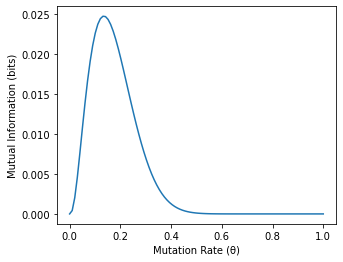

In [6]:
# Define the range of mutation rates (theta) to explore
theta_values = np.linspace(0, 1, 100)
mutual_information_values = []

# Calculate mutual information for each mutation rate
for theta in theta_values:
    mutual_information_values.append(calculate_mutual_information(l, theta, m_star, position_in_binding_site))

# Plotting
plt.figure(figsize=(5, 4))
plt.plot(theta_values, mutual_information_values)
plt.xlabel('Mutation Rate (θ)')
plt.ylabel('Mutual Information (bits)')
plt.show()